In [19]:
import pandas as pd
import re

#Read the data from csv into dataframe
LGA_INFO = pd.read_csv('Data/LGA_2016_VIC.csv')
LGA_SPORT_FACILITY = pd.read_csv('Data/Victoria_Sport_and_Recreation_Facility_Location.csv')
LGA_HEALTH_RISK = pd.read_csv('Data/LGA15_Adults_Health_Risk_Factor_Estimates.csv')

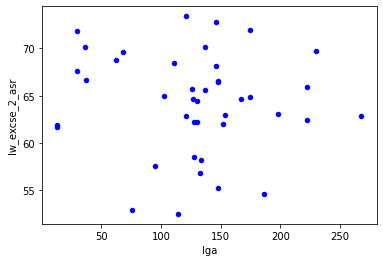

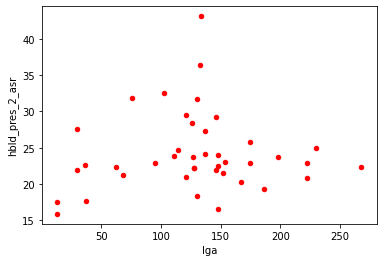

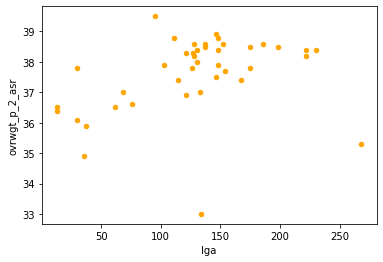

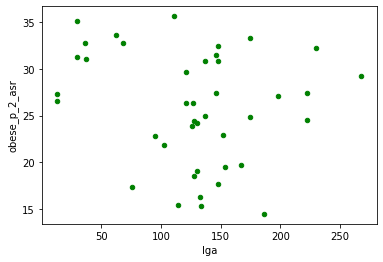

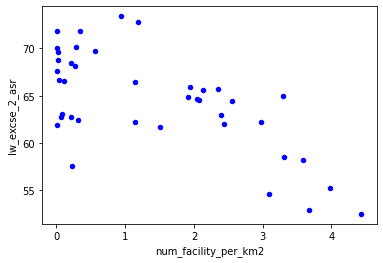

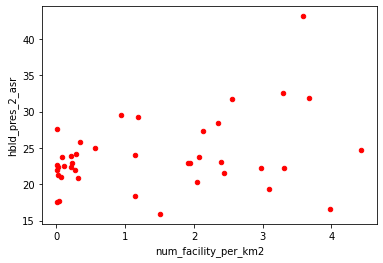

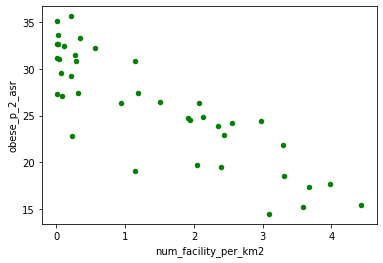

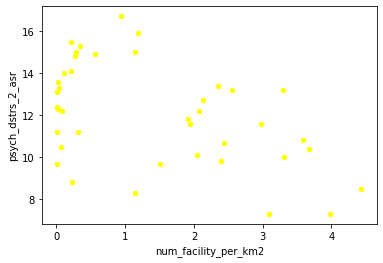

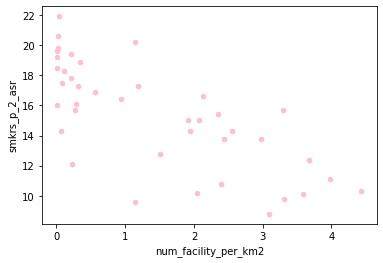

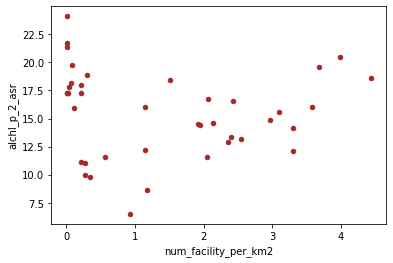

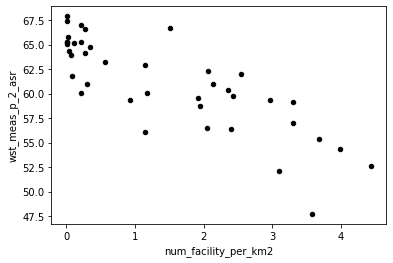

In [88]:
#Cleaning area name and corresponding area code, and make a dictionary
LGA_NAME_TO_CODE = LGA_INFO[['LGA_CODE_2016', 'LGA_NAME_2016']]
LGA_NAME_TO_CODE = LGA_NAME_TO_CODE.drop_duplicates()
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.replace(r' \([^()]*\)', '', regex=True)
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.upper()
LGA_DIC = LGA_NAME_TO_CODE.set_index('LGA_NAME_2016')['LGA_CODE_2016'].to_dict()

#Find the corresponding area codes for the sport facilities
area_code = LGA_SPORT_FACILITY['lga'].to_list()
for i in range(len(area_code)):
    if area_code[i] in LGA_DIC:
        area_code[i] = LGA_DIC[area_code[i]]
    else:
        area_code[i] = None

#Print the area names that does not have a corresponding code
# for i in range(len(area_code)):
#     if area_code[i] == None:
#         print(LGA_SPORT_FACILITY['lga'].to_list()[i])

#Add the area codes and clean the sport facility dataframe
LGA_SPORT_FACILITY['lga_code'] = area_code
LGA_SPORT_FACILITY = LGA_SPORT_FACILITY.dropna(subset=['lga_code'])
LGA_SPORT_FACILITY['lga_code'] = LGA_SPORT_FACILITY['lga_code'].astype(dtype='int')

#Group the sport facilities by area code
FACILITY_COUNT_PER_LGA = LGA_SPORT_FACILITY.groupby('lga_code', as_index=False).count()[['lga_code', 'lga']]
#print(FACILITY_COUNT_PER_LGA)

#Join the sport facility dataframe and health risk dataframe together by lga
JOINED = FACILITY_COUNT_PER_LGA.set_index('lga_code').join(LGA_HEALTH_RISK.set_index('lga_code'), on='lga_code', how='left', sort=False)
# print(JOINED)

plot1 = JOINED.plot.scatter(x='lga', y='lw_excse_2_asr', c='Blue')
plot2 = JOINED.plot.scatter(x='lga', y='hbld_pres_2_asr', c='Red')
plot3 = JOINED.plot.scatter(x='lga', y='ovrwgt_p_2_asr', c='Orange')
plot4 = JOINED.plot.scatter(x='lga', y='obese_p_2_asr', c='Green')

#Read region population csv
region_population = pd.read_csv('Data/regional_population_csv.csv')

#Join region_population dataframe and JOINED together by lga code
JOINED_2 = JOINED.join(region_population.set_index('lga_code'), on='lga_code', how='left', sort=False)
JOINED_2['num_facility_per_capita(2016)']=JOINED_2['lga']/JOINED_2['population2016']
JOINED_2['num_facility_per_capita(2017)']=JOINED_2['lga']/JOINED_2['population2017']
JOINED_2['num_facility_per_km2']=JOINED_2['lga']/JOINED_2['Area(km2)']

# Remove one outlier with num_facility_perr_km2 > 5
JOINED_2 = JOINED_2[JOINED_2['num_facility_per_km2']<5]

plot5 = JOINED_2.plot.scatter(x='num_facility_per_km2', y='lw_excse_2_asr', c='Blue')
plot6 = JOINED_2.plot.scatter(x='num_facility_per_km2', y='hbld_pres_2_asr', c='Red')
plot8 = JOINED_2.plot.scatter(x='num_facility_per_km2', y='obese_p_2_asr', c='Green')
plot9 = JOINED_2.plot.scatter(x='num_facility_per_km2', y='psych_dstrs_2_asr', c='Yellow')
plot11 = JOINED_2.plot.scatter(x='num_facility_per_km2', y='smkrs_p_2_asr', c='Pink')
plot12 = JOINED_2.plot.scatter(x='num_facility_per_km2', y='alchl_p_2_asr', c='Brown')
plot13 = JOINED_2.plot.scatter(x='num_facility_per_km2', y='wst_meas_p_2_asr', c='Black')

**Regression for lw_excse_2_asr**

Linear

[[ 1.         -0.03356704]
 [-0.03356704  1.        ]]
Coefficients:  [-2.5455855]

Intercept:  68.0385238235378

Coefficient of determination: 0.44


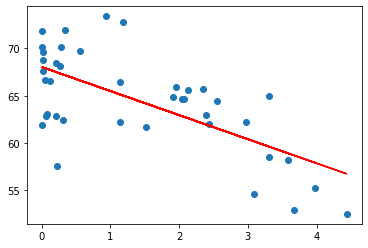

In [89]:
X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['lw_excse_2_asr']
import numpy as np
print(np.corrcoef(JOINED_NoOutlier['num_facility_per_capita(2016)'],JOINED_NoOutlier['lw_excse_2_asr']))
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

quadratic

Coefficients:  [ 0.         1.4706014 -1.1203868]

Intercept:  66.64588417336479

Coefficient of determination: 0.55


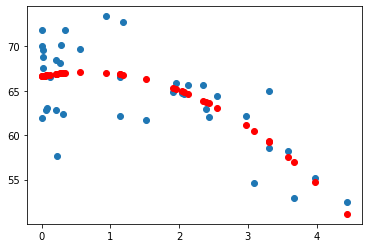

In [90]:
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=2)
X_polynom = polynom.fit_transform(X)
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_polynom, y)
y_predict = poly_reg.predict(polynom.fit_transform(X))

print('Coefficients: ', end = ' ')
print(poly_reg.coef_)
print('')

print('Intercept: ', end = ' ')
print(poly_reg.intercept_)
print('')

r2_train = poly_reg.score(X_polynom, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

# plot fitting results
plt.scatter(X, y)
plt.scatter(X, y_predict, color='red')
plt.show()

**Regression for obese_p_2_asr**

Linear

[[1.        0.1261062]
 [0.1261062 1.       ]]
Coefficients:  [-3.67266748]

Intercept:  31.26426626437196

Coefficient of determination: 0.73


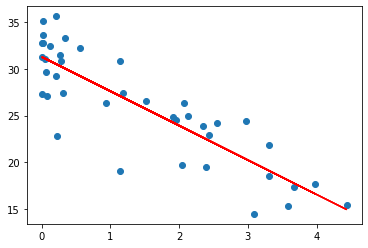

In [91]:
X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['obese_p_2_asr']
import numpy as np
print(np.corrcoef(JOINED_NoOutlier['num_facility_per_capita(2016)'],JOINED_NoOutlier['obese_p_2_asr']))
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

quadratic log-scale

Coefficients:  [ 0.         -4.25529738 -0.69658723]

Intercept:  26.033092293773276

Coefficient of determination: 0.70


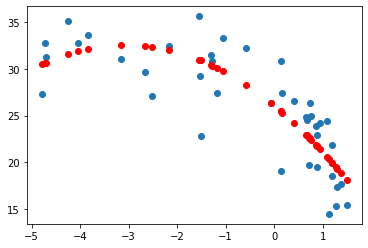

In [92]:
X = np.log(JOINED_2[['num_facility_per_km2']])
y = JOINED_2['obese_p_2_asr']
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=2)
X_polynom = polynom.fit_transform(X)
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_polynom, y)
y_predict = poly_reg.predict(polynom.fit_transform(X))

print('Coefficients: ', end = ' ')
print(poly_reg.coef_)
print('')

print('Intercept: ', end = ' ')
print(poly_reg.intercept_)
print('')

r2_train = poly_reg.score(X_polynom, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

# plot fitting results
plt.scatter(X, y)
plt.scatter(X, y_predict, color='red')
plt.show()

**Regression for hbld_pres_2_asr**

[[1.        0.2094712]
 [0.2094712 1.       ]]
Coefficients:  [0.62865202]

Intercept:  22.555969133782785

Coefficient of determination: 0.04


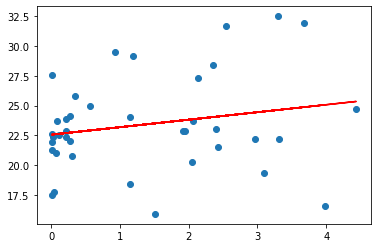

In [64]:
JOINED_NoOutlier = JOINED_2[JOINED_2['hbld_pres_2_asr']<35]
X = JOINED_NoOutlier[['num_facility_per_km2']]
y = JOINED_NoOutlier['hbld_pres_2_asr']
import numpy as np
print(np.corrcoef(JOINED_NoOutlier['num_facility_per_km2'],JOINED_NoOutlier['hbld_pres_2_asr']))
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

**Regression for psych_dstrs_2_asr**

Linear

[[ 1.         -0.47184784]
 [-0.47184784  1.        ]]
Coefficients:  [-0.83790599]

Intercept:  13.24439771925698

Coefficient of determination: 0.23


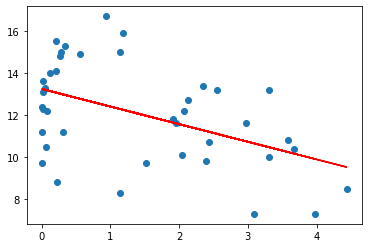

In [94]:
X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['psych_dstrs_2_asr']
import numpy as np
print(np.corrcoef(JOINED_NoOutlier['num_facility_per_km2'],JOINED_NoOutlier['psych_dstrs_2_asr']))
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

quadratic

Coefficients:  [ 0.          0.3781519  -0.33924099]

Intercept:  12.822721517934008

Coefficient of determination: 0.27


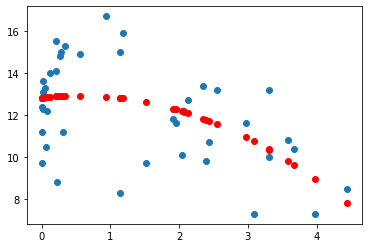

In [95]:
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=2)
X_polynom = polynom.fit_transform(X)
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_polynom, y)
y_predict = poly_reg.predict(polynom.fit_transform(X))

print('Coefficients: ', end = ' ')
print(poly_reg.coef_)
print('')

print('Intercept: ', end = ' ')
print(poly_reg.intercept_)
print('')

r2_train = poly_reg.score(X_polynom, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

# plot fitting results
plt.scatter(X, y)
plt.scatter(X, y_predict, color='red')
plt.show()

In [96]:
# F-Test
import scipy.stats
mse = mean_squared_error(y, y_predict)
msr = sum((y_predict-y.mean())*(y_predict-y.mean()))/1
F = msr/mse
df1 = 2
df2 = JOINED_2.shape[0]-3 
p_value = 1 - scipy.stats.f.cdf(F, df1, df2)
print(p_value)

1.665345720069933e-05


**Regression for smkrs_p_2_asr**

[[ 1.         -0.70782562]
 [-0.70782562  1.        ]]
Coefficients:  [-1.85374028]

Intercept:  17.976893441203515

Coefficient of determination: 0.53


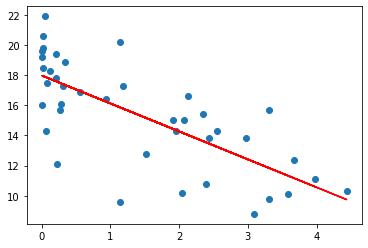

In [74]:

X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['smkrs_p_2_asr']
import numpy as np
print(np.corrcoef(JOINED_NoOutlier['num_facility_per_km2'],JOINED_NoOutlier['smkrs_p_2_asr']))
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

**Regression for alchl_p_2_asr**

[[ 1.         -0.06628064]
 [-0.06628064  1.        ]]
Coefficients:  [-0.1644097]

Intercept:  15.72386817722047

Coefficient of determination: 0.00


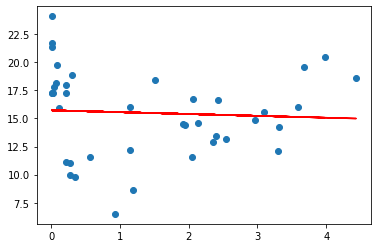

In [97]:

X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['alchl_p_2_asr']
import numpy as np
print(np.corrcoef(JOINED_NoOutlier['num_facility_per_km2'],JOINED_NoOutlier['alchl_p_2_asr']))
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

**Regression for wst_meas_p_2_asr**

[[ 1.         -0.81370185]
 [-0.81370185  1.        ]]
Coefficients:  [-2.79719848]

Intercept:  65.06893621253013

Coefficient of determination: 0.67


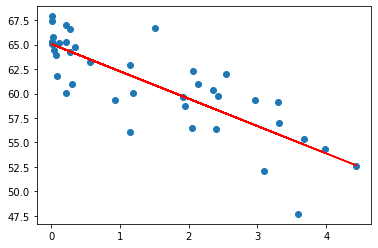

In [98]:

X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['wst_meas_p_2_asr']
import numpy as np
print(np.corrcoef(JOINED_NoOutlier['num_facility_per_km2'],JOINED_NoOutlier['wst_meas_p_2_asr']))
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()